# Teorema de Stockes y Teorema de Gauss

In [1]:
import time
print(' Última ejecución ', time.asctime() )

 Última ejecución  Thu Jan 25 14:25:28 2024


### Objectivos

Extender el teorema de Green a 3D. Teorema de Stockes.

Extender el teorema de la divergencia a 3D. Teorema de Gauss.

Mostrar algunos ejemplos sencillos.

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Teorema de Stockes

#### Superficies orientables

Una superficie es orientable si tiene dos caras, por ejemplo, una hoja de papel.

Fíjare en la siguiente figura, es una cinta de Moebius y solo tiene una cara.

<img src="imgs/escher-moebius.jpg" width="300"/>



**Orientación dextrógira**

Damos la orientación de una superficie mendiante un giro dextrógiro. Giraremos por la línea de la frontera en sentido anti-horario dejando la superficie siempre a nuestra izquierda.

*Observa*: la siguiente figura, la superficie y su frontera. El giro dextrógiro seguiría la frontera en sentido contratio al de las agujas del reloj.

In [3]:
R = 2.
rrange, phirange = (0, R, 40), (0, 2*np.pi, 40)
sx = lambda r, phi : r * np.cos(phi)
sy = lambda r, phi : r * np.sin(phi)
sz = lambda r, phi : R*R - sx(r, phi)*sx(r, phi) - sy(r, phi)*sy(r, phi)
cx = lambda phi    : R * np.cos(phi) 
cy = lambda phi    : R * np.sin(phi)
cz = lambda phi    : 0. + 0. * phi

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:298: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default 

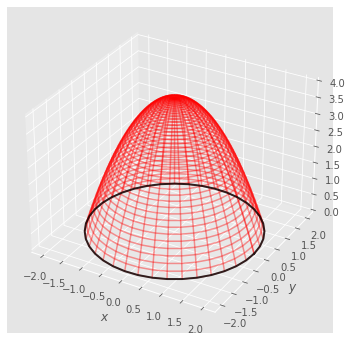

In [4]:
gf.wfsurface(sx, sy, sz, rrange, phirange, alpha = 0.4, color='red')
gf.line3d   (cx, cy, cz, phirange, newfig = False, alpha = 0.4, color = 'black');


**El teorema de Stockes** es la generalización del de Green a 3 dimensiones.

**Teorema**: Sea una superficie $S$ orientable, cuya frontera ${\bf c}(t)$ se recorre en sentido anti-horario, y parametrizada con $\sigma(u, v)$, donde $(u, v)$ están definidas en una región $R$; y sea un campo vectorial con derivadas primeras continuas ${\bf F}(x, y, z) = \left( F_x, F_y, F_z \right)$, se cumple:

$$
\int_{S} \nabla \times {\bf F} \, \mathrm{d} \vec{\sigma} = \oint_{\bf c} {\bf F} \, \mathrm{d}{\bf s}
$$



1) Consideremos primero un campo ${\bf F}(x, y, z) = \left( F_x (x, y, z), 0, 0\right)$, y una superficie orientable $S$ con frontera ${\bf c}$ parametrizada con $\sigma(x, y, z(x, y) )$ en una región $R$ de $(x, y)$ con frontera ${\bf d}$.

La integral a lo largo de la frontera ${\bf c}$ en sentido anti-horario es

$$
\oint_{\bf c} {\bf F}(x, y, z) \, \mathrm{d}{\bf s} = \oint_{{\bf d}} F_x(x, y, z(x, y)) \, \mathrm{d}x
$$

Donde podemos entender $F_x(x, y, z(x, y)) = f_x(x, y) $ como una función compuesta que depende de $(x, y)$ directamente e indirectamente via $z(x, y)$, y podemos re-expresar el último término de la igualdad con una integral de 2 dimensiones.

$$
= \oint_{\bf d} f_x(x, y) \, \mathrm{d} x  
$$


Y aplicar el teorema de Green:

$$
= \int_{R} - \frac{\partial f_x}{\partial y} \mathrm{d}x \mathrm{d}y
$$

Aplicando la regla de la cadena, obtenemos:

$$
\frac{\partial f_x}{\partial y} = \frac{\partial F_x}{\partial y} + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y}
$$

Por otro lado sabemos el vector ${\bf n}$ de una superficie $\sigma(x, y) = (x, y, z(x, y))$ es:

$$
{\bf n} = \left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1\right)
$$


Luego podemos reescribir:

$$
\frac{\partial F_x}{\partial y}  + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y} 
=  \left( 0, - \frac{\partial F_x}{\partial z},  \frac{\partial F_x}{\partial y} \right) \left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1 \right) 
$$

Esto es
$$
= \oint_{{\bf d}} - \left( \frac{\partial F_x}{\partial y} + \frac{\partial F_x}{\partial z} \frac{\partial z}{\partial y} \right) \, \mathrm{d}x
$$

$$
\int_{R}  \left( 0, \frac{\partial F_x}{\partial z}, - \frac{\partial F_x}{\partial y} \right) 
\left( - \frac{\partial z}{\partial x}, - \frac{\partial z}{\partial y}, 1 \right) \mathrm{d}x \mathrm{d}y 
= \int_{S} \left( 0, \frac{\partial F_x}{\partial z}, - \frac{\partial F_x}{\partial y}\right) \mathrm{d} \vec{\sigma}
$$

2) Si consideramos el vector ${\bf F}(x, y, z) = (0, F_y(x, y, z), 0)$ en la misma superficie obtenemos:
    
$$
\oint_{S} {\bf F} \, \mathrm{d}{\bf s} = \int_S \left(- \frac{\partial F_y}{\partial z}, 0,   \frac{\partial F_y}{\partial x} \right) \, \mathrm{d}\vec{\sigma}
$$

3) Y finalmente con ${\bf F}(x, y, z) = (0, 0, F_z(x, y, z))$ con parametrización de $S$ en $\sigma(x, y(x, z), z)$

$$
\oint_{S} {\bf F} \, \mathrm{d}{\bf s} = \int_S \left(  \frac{\partial F_z}{\partial y}, - \frac{\partial F_z}{\partial x} , 0 \right) \, \mathrm{d}\vec{\sigma}
$$



Y por lo tanto, para ${\bf F}(x, y, z) = \left( F_x, F_y, F_z \right)$
    
$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 F_x &  F_y & F_z\\
 \end{array} 
 \right| 
$$    

$$
\oint_{{\bf c}} {\bf F} \, \mathrm{d}{\bf s} = \int_{S}
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}, \,  \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x}, \, \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y}\right) \mathrm{d} \vec{\sigma}
$$
$$
= \int_S \nabla\times F \, \mathrm{d}\vec{\sigma}
$$

con lo que queda demostrado el teorema de Stockes.

En la siguiente figura se muestra una la malla, la superficie está dividida en pequeños cuadrados. Consideremoslos infinitesimales. Si aplicamos el teorema de Stockes en cada cuadradito, la circulación en sus lados coincide con el rotacional en el centro por el área diferencial del cuadrado. 

<img src="imgs/malla_stockes.jpg" width="300"/>

Si te das cuenta la circulación en dos cuadrados adyacentes se anulan y da como resultado la circulación en la frontera externa. Y esa cantidad debe ser igual a la integral del rotacional en la superficie.

Date cuenta que si la superficie es maleable, el teorema se aplica igualmente, la circulación en todos los cuadraditos es al final siempre la circulación en su frontera, e igual a la integral del rotacional en la superficie, da igual la forma de ésta.

In [5]:
def espira():
    xrange = (-2., 2., 10)
    Ex = lambda x, y:  -y/2 + x/2 # -y/2 #+ x/2
    Ey = lambda x, y:   x/2 + y/2
    gf.quiver2d(Ex, Ey, xrange, xrange);
    x0, y0, xside, yside = -1, -1., 2., 2.
    gf.square( (x0, y0), xside, yside, color = 'r');
    gf.arrow ( x0 + 0.4 * xside, y0              ,  0.2 * xside,  0.0       , head = 0.1, color = 'r');
    gf.arrow ( x0 + xside      , y0 + 0.4 * yside,  0.0        ,  0.2* yside, head = 0.1, color = 'r');
    gf.arrow ( x0 + 0.6 * xside, y0 + 1.0 * yside, -0.2 * xside,  0.0       , head = 0.1, color = 'r');
    gf.arrow ( x0              , y0 + 0.6 * yside,  0.0        , -0.2* yside, head = 0.1, color = 'r');
    plt.gca().set_aspect('equal', 'box')

*Inciso*

Vamos a ver una demostración aproximada del teorema de (Green-Stockes)

Considera la espera de tamaño diferencial, con lados $\Delta x, \, \Delta y$ con vértice inferior en $(x_0, y_0)$. El campo tiene derivadas parciales continuas, por lo que admite el desarrollo de Taylor.

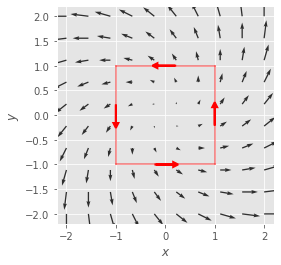

In [6]:
espira()

Considera la integral por los lados verticales en los que solo partipa $F_y$. Nota que el lado de la derecha entra con un (+) y el de la izquierda con un (-) en la circulación. La integral podemos aproximarla:

$$
F_y(x_0 + \Delta x, y_0) \, \Delta y - F_y(x_0, y_0) \, \Delta y \simeq \frac{\partial F_y}{\partial x}(x_0 ,y_0) \, \Delta x \Delta y
$$

Considera ahora la integral en los lados horizontales, arriba aparece un signa (-) al desplazarnos hacia la izquierda y abajo un signo (+).

$$
- F_x(x_0, y_0 + \Delta y) \, \Delta x + F_x(x_0, y_0) \, \Delta x \simeq - \frac{\partial F_x}{\partial y}(x_0 ,y_0) \, \Delta y \Delta x
$$

Por lo tanto, la integral a lo largo de la espira infinitesimal es:

$$
\left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \, \mathrm{d}x \mathrm{d}y
$$



**Ejercicio**: Verificar el teorema de Stockes en la superficie dada por la intersección de un cilindro infinito con eje en la dirección $z$ y base $x^2 + y^2 = 1$, y el plano $x+y+z =1$, con ${\bf F}(x, y, z) = (-y^3, x^3, z^3)$

In [7]:
phirange, zrange = (0., 2*np.pi, 30), (-1, 3, 30)
s1x = lambda z, phi : 1 * np.cos(phi)
s1y = lambda z, phi : 1 * np.sin(phi)
s1z = lambda z, phi : z + 0.*phi
rrange = (0., 1., 20)
s2x = lambda r, phi : r * np.cos(phi)
s2y = lambda r, phi : r * np.sin(phi)
s2z = lambda r, phi : 1 - s2x(r, phi) - s2y(r, phi)
cx = lambda phi    : 1 * np.cos(phi) 
cy = lambda phi    : 1 * np.sin(phi)
cz = lambda phi    : 1 - cx(phi) - cy(phi)

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:298: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default 

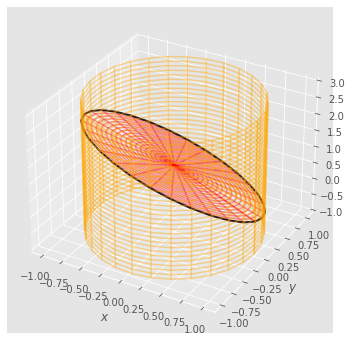

In [8]:
gf.wfsurface(s1x, s1y, s1z, zrange, phirange, alpha = 0.4, color='orange')
gf.wfsurface(s2x, s2y, s2z, rrange, phirange, newfig = False, alpha = 0.4, color = 'red');
gf.line3d   (cx, cy, cz, phirange, newfig = False, alpha = 0.4, color = 'black');

In [9]:
Fx = lambda x, y, z : -y**3 
Fy = lambda x, y, z :  x**3 
Fz = lambda x, y, z :  z**3 
Rx = lambda x, y, z :  0 
Ry = lambda x, y, z :  0
Rz = lambda x, y, z :  3*x*x + 3*y*y

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:183: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default k

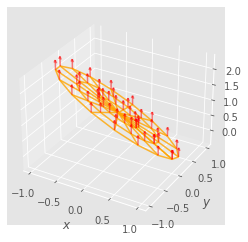

In [10]:
rrange, phirange = (0., 1, 4), (0, 2*np.pi, 18)
gf.quiver3d_in_wfsurface(Rx, Ry, Rz, s2x, s2y, s2z, rrange, phirange, alpha = 0.5, color = 'red');
gf.wfsurface(s2x, s2y, s2z, rrange, phirange, newfig = False, alpha = 0.8, color = 'orange');

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:199: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:298: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')


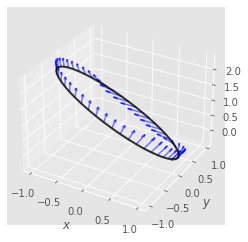

In [11]:
rrange, phirange = (0., 1, 4), (0, 2*np.pi, 50)
gf.quiver3d_in_line3d(Fx, Fy, Fz, cx, cy, cz, phirange, alpha = 0.5, color = 'blue');
gf.line3d(cx, cy, cz, phirange, newfig = False, alpha = 0.8, color = 'black');

Recordemos que la superficie tiene como base un disco de radio unidad y la intersección con el plano $x + y + z = 1$

Podemos parametrizar la superficie:

$$
\sigma (x, y ) = (x, y, 1 - x -y), \;\;\; x^2 + y^2 \le 1
$$ 

donde:

$$
{\bf n}(x, y) = (1, 1, 1)
$$

Y la frontera con la línea:

$$
{\bf c}(\phi) = (\cos \phi, \sin \phi, 1 - \cos \phi - \sin \phi),\,\,\, \phi \in [0, 2 \pi)
$$

donde:

$$
\dot{{\bf c}}(\phi) = (-\sin \phi, \cos \phi, \sin \phi + \cos \phi)
$$
 

El rotacional de ${\bf F} = (-y^3, x^3, z^3)$ es:

$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 -y^3 &  x^3 & z^3\\
 \end{array} 
 \right| = \left(0, 0, 3 x^2 + 3 y^2\right) 
$$

La integral en la superfice:

$$
\int_{S} \nabla \times {\bf F} \, \mathrm{d}\vec{\sigma} = \int_{R} (0, 0, 3 x^2 + 3 y^2) \, (1, 1, 1) \, 
\mathrm{d}x\mathrm{d}y \\ = \int_R 3 (x^2 + y^2)\, \mathrm{d}x\mathrm{d}y 
$$

La región $R$ es el disco de radio unidad, que podemos integrar en polares

$$
\int_0^{2\pi} \int_0^1 3 r^2 \, r\mathrm{d}r \mathrm{d}\phi 
= \frac{3}{4} r^4 \Big|_0^1 2 \pi = \frac{3 \pi}{2}
$$

recuerda que el Jacobiano en polares es $r$.

La integral de ${\bf F}$ a lo largo de la frontera:
    
$$
\oint_{{\bf c}}{\bf F} \, \mathrm{d}{\bf s} = 
\oint_{{\bf c}} - y^3 \mathrm{d}x + x^3 \mathrm{d}y  + z^3 \mathrm{d}z
$$

$$
= \int_0^{2\pi}\left(- \sin^3 \phi, \cos^3 \phi, (1 - \cos \phi - \sin \phi)^3  \right) \, \left( -\sin \phi, \cos \phi, \sin \phi - \cos \phi \right)  \mathrm{d}\phi
$$
$$
= \int_0^{2\pi} \left( \sin^4 \phi + \cos^4  \phi  + (1 - \cos \phi - \sin \phi)^3 (\sin \phi  - \cos \phi) \right) \, \mathrm{d}\phi
$$


Que dividimos en dos integrales:

$$
 \int_0^{2\pi} (\sin^4 \phi + \cos^4 \phi) \, \mathrm{d}\phi + \int_0^{2\pi} (1-\cos\phi-\sin\phi)^3 (\sin \phi -\cos \phi) \, \mathrm{d}\phi
$$



En la primera intergral, si operamos:

$$
\sin^4 \phi + \cos^4 \phi
= \frac{1}{4}\left( 1 - \cos 2 \phi \right)^2 + \frac{1}{4}\left(1 + \cos 2\phi \right)^2 
$$
$$
= \frac{1}{4} \left( 1 + \cos^2 2\phi - 2 \cos 2 \phi + 1 + \cos^2 2\phi + 2 \cos 2 \phi\right)
$$
$$
= \frac{1}{2} (1 + \cos^2 2 \phi) = \frac{1}{2} \left( 1 + \frac{1}{2} (1 + \cos 4 \phi ) \right)
$$

Así:

$$
\int_0^{2\pi} \left(\frac{3}{4} + \frac{1}{4} \cos 4 \phi \right) \mathrm{d}\phi = \left( \frac{3 \phi}{4} + \frac{1}{16} \sin  4 \phi\right) \Big|_0^{2\pi}  =  \frac{3\pi}{2}
$$

La segunda integral se calcula directamente:

$$ 
 \int_0^{2\pi} (1-\cos\phi-\sin\phi)^3 (\sin \phi -\cos \phi) \, \mathrm{d}\phi
= \frac{1}{4}\left( 1 - \cos \phi - \sin \phi \right)^4 \Big|_0^{2\pi} = 0
$$

**Ejercicio**: Verifica el teorema de Stockes con el campo ${\bf F}(x, y, z) = (-y, x, 0)$ en la superficie $z = 4 - x^2 - y^2$ con $z \ge 0$.

In [12]:
sx = lambda r, phi : r * np.cos(phi)
sy = lambda r, phi : r * np.sin(phi)
sz = lambda r, phi : 4 - sx(r, phi)*sx(r, phi) - sy(r, phi)*sy(r, phi)
cx = lambda phi    : 2. * np.cos(phi) 
cy = lambda phi    : 2. * np.sin(phi)
cz = lambda phi    : 0. + 0. * phi

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:298: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default 

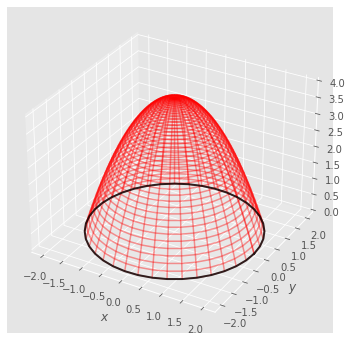

In [13]:
rrange, phirange = (0, 2, 40), (0, 2*np.pi, 40)
gf.wfsurface(sx, sy, sz, rrange, phirange, alpha = 0.4, color='red')
gf.line3d   (cx, cy, cz, phirange, newfig = False, alpha = 0.4, color = 'black');

In [14]:
Fx = lambda x, y, z : -1.*y + 0.*x
Fy = lambda x, y, z :  1.*x + 0.*y
Fz = lambda x, y, z :  0. + 0.*z
Rx = lambda x, y, z :  0.*x
Ry = lambda x, y, z :  0.*y
Rz = lambda x, y, z :  2. + 0.*z

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:183: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default k

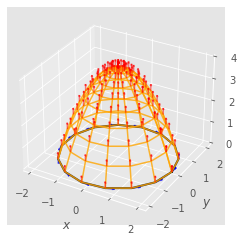

In [15]:
rrange, phirange = (0., 2, 10), (0, 2*np.pi, 16)
gf.quiver3d_in_wfsurface(Rx, Ry, Rz, sx, sy, sz, rrange, phirange, alpha = 0.5, color = 'red');
gf.wfsurface(sx, sy, sz, rrange, phirange, newfig = False, alpha = 0.8, color = 'orange');
gf.line3d(cx, cy, cz, phirange, newfig = False, alpha = 0.2, color = 'black');
gf.quiver3d_in_line3d(Fx, Fy, Fz, cx, cy, cz, phirange, newfig = False, alpha = 0.5, color = 'blue');

Parametrizamos la superficie como una gráfica:

$$
\sigma(x, y) = \left( x, y, 4 - x^2 - y^2\right)
$$

$$
{\bf n}(x, y) = (2x, 2y, 1)
$$

Parametrizamos la frontera, que es la circunferencia de radio 2:

$$
{\bf c}(\phi) = (2 \cos \phi, 2 \sin \phi, 0)
$$

$$
\dot{{\bf c}} (\phi) = (-2 \sin \phi, 2 \cos \phi, 0)
$$

El rotacional:

$$
\nabla \times {\bf F}  
= \left| \begin{array}{ccc} {\bf i} & {\bf j} & {\bf k} \\
 \frac{\partial}{\partial x} &  \frac{\partial}{ \partial y} & \frac{\partial }{\partial z} \\
 -y &  x & 0\\
 \end{array} 
 \right| = \left(0, 0, 2\right) 
$$

La integral del rotacional en la superficie:

$$
\int_S \nabla \times {\bf F} \, \mathrm{d} \vec{\sigma} = \int_R (0, 0, 2) \, (2x, 2y, 1) \, \mathrm{d}x\mathrm{d}y
= \int_R 2 \, \mathrm{d}x\mathrm{d}y
$$

La región $R$ es el disco de radio 2, si cambiamos a polares

$$
= \int_0^2 \int_0^{2\pi} 2 \, r \mathrm{d} r\mathrm{d}\phi = 2 \pi r^2 \Big|_0^2 = 8 \pi
$$

Y la integral del campo a lo largo de la frontera:

$$
\oint_{\bf c} {\bf F} \, \mathrm{d}{\bf s} = \oint -y \, \mathrm{d}x + x \, \mathrm{d}y
$$

$$
\int_0^{2\pi} (-2 \sin \phi, 2 \cos \phi, 0 ) \, (-2 \sin \phi, 2 \cos \phi, 0) \, \mathrm{d}\phi
$$
$$
= \int_0^{2\pi} 4 \, (\sin^2 \phi + \cos^2 \phi) \, \mathrm{d}\phi = \int_0^{2\pi}4 \, \mathrm{d}\phi = 8 \pi
$$

### Teorema de Strogradski-Gauss

El teorema de Gauss corresponde a la extensión del teorema de la divergencia a 3 dimensiones.

**Teorema**: Sea un volumen regular $V$, limitado por una superficie cerrada $S$, y sea un campo vectorial con derivadas primeras continuas ${\bf F}(x, y, z) = \left( F_x, F_y, F_z \right)$, se cumple:

$$
\oint_{S} {\bf F} \, \mathrm{d}\vec{\sigma} = \int_V \nabla \cdot {\bf F} \, \mathrm{d}x\mathrm{d}y\mathrm{d}x
$$

donde la superficie cerrada está definida hacia afuera.

Sea un volumen regular definido por una región $D$ en $(x, y)$ y $z_1(x, y) \le z \le z_2(x, y)$, donde $z_1(x,y), \, z_2(x,y)$ son dos funciones escalares que nos limitan los valores de $z$.

Consideremos:

$$
\int_V \frac{\partial F_z}{\partial z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \int_D F_z(x, y, z) \Big|_{z_1}^{z_2} \, \mathrm{d}x\mathrm{d}y \\
= \int_D  \left[F_z(x, y, z_2(x,y)) - F_z(x, y, z_1(x,y) \right] \mathrm{d}x \mathrm{d}y
$$


/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:311: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = plt.gca(projection='3d')


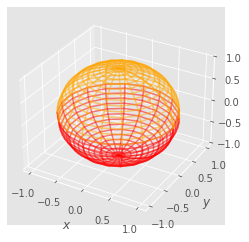

In [16]:
r, phirange              = 1, (0, 2*np.pi, 20)
theta1range, theta2range = (0, np.pi/2, 16), (np.pi/2, np.pi, 16)
Fx = lambda x, y, z :  x
Fy = lambda x, y, z :  y
Fz = lambda x, y, z :  z
sx = lambda theta, phi :  r * np.sin(theta) * np.cos(phi)
sy = lambda theta, phi :  r * np.sin(theta) * np.sin(phi)
sz = lambda theta, phi :  r * np.cos(theta) 
gf.wfsurface(sx, sy, sz, theta1range, phirange, newfig = False, alpha = 0.5, color = 'orange');
gf.wfsurface(sx, sy, sz, theta2range, phirange, newfig = False, alpha = 0.5, color = 'red');


La integral

$$
\int_D F_z\left(x, y, z_2(x, y)\right) \, \mathrm{d}x\mathrm{d}y 
= \int_{D} F_z \hat{k} \, \frac{\mathrm{d}x\mathrm{d}y}{|\cos \gamma|} \hat{n}
= \int_{z_2} F_z \hat{k} \, \mathrm{d}\vec{\sigma}
$$

Donde hemos introducido el término

$$
\frac{\hat{k} \, \hat{n}}{|\hat{k} \, \hat{n}|} = \frac{\hat{k} \, \hat{n}}{|\cos \gamma|},
$$
$$
\mathrm{d}\vec{\sigma} = \frac{\hat{n}}{|\cos \gamma|} \mathrm{d}x\mathrm{d}y
$$

$\hat{n}$ es el verctor unitario normal al diferencial de superficie de la superfice dada por $z_2$, y $\gamma$ el ángulo que forma $\hat{n}$ con $\hat{k}$. Este término es $1$ para $z_2$, y es $-1$ para $z_1$ dado que hemos definido la superficie hacia fuera.

Así:

$$
\int_V \frac{\partial F_z}{\partial z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \oint F_z \hat{k} \, \mathrm{d}\vec{\sigma} 
$$

Y de forma similar para el resto de sumandos, considerando para cada caso la correspondiente definición de las superficies que limitan el volumen.

$$
\int_V \frac{\partial F_y}{\partial y} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \oint F_y \hat{j} \, \mathrm{d}\vec{\sigma} 
$$

$$
\int_V \frac{\partial F_x}{\partial x} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z 
= \oint F_x \hat{i} \, \mathrm{d}\vec{\sigma} 
$$

Con lo que queda demostrato el teorema de Gauss.

*Observa* el siguiente cubo construido con cubitos. Si fueran infinitesimales, la integral del flujo en sus caras sería lo mismo que la divergencia en el centro del cubito por su volumen diferencial

Si los cubitos están adyantes el cálculo de su flujo se anula en las paredes que se tocan, y la suma de los flujos en todos los cubitos es igual a la de las caras de la superficie frontera. ¡Mientras que esa cantidad será igual a la suma de la divergencia en cada cubito por su volumen!

<img src="imgs/cubes_gauss.jpeg" width="250"/>



**Ejemplo**: Verifica el teorema de Gauss con el campo ${\bf F}(x, y, z) = (x, y, z)$ en la esfera de radio unidad.

*Observa*: Como el campo es radial, igual que los elementos diferenciales de área de la esfera.

/Users/Xabier/Library/CloudStorage/OneDrive-UniversidadedeSantiagodeCompostela/Docencia/PCD_PTU/MM3/2324/USC-MMIII/notebooks/graph_utils.py:183: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


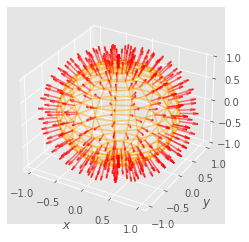

In [17]:
r, thetarange, phirange = 1, (0., np.pi, 18), (0, 2*np.pi, 18)
Fx = lambda x, y, z :  x
Fy = lambda x, y, z :  y
Fz = lambda x, y, z :  z
sx = lambda theta, phi :  r * np.sin(theta) * np.cos(phi)
sy = lambda theta, phi :  r * np.sin(theta) * np.sin(phi)
sz = lambda theta, phi :  r * np.cos(theta) 
gf.quiver3d_in_wfsurface(Fx, Fy, Fz, sx, sy, sz, thetarange, phirange, alpha = 0.5, color = 'red');
gf.wfsurface(sx, sy, sz, thetarange, phirange, newfig = False, alpha = 0.5, color = 'orange');

a) la divergencia
$\nabla \, {\bf F} = 3$

$$
\int_V 3 \, \mathrm{d}x \mathrm{d}y \mathrm{d}z = 3 \frac{4 \pi}{3} = 4 \pi
$$

b) Si parametrizamos la esfera en coordenadas esféricas, ya vimos que

$$
{\bf n}(\theta, \phi) = \left(\sin \theta \cos \phi,  \sin \theta \sin \phi, \cos \theta \right) \, \sin \theta
$$

$$
{\bf F} (\theta, \phi) = \left(\sin \theta \cos \phi, \sin \theta \sin \phi, \cos \theta \right)
$$

Luego:

$$
{\bf F} \, {\bf n} = \sin \theta
$$

Así

$$
\oint_{S} {\bf F} \, \mathrm{d}\vec{\sigma} = \int_0^\pi \int_0^{2\pi} \sin \theta \, \mathrm{d}\theta \mathrm{d}\phi = \phi \Big|_0^{2\pi} (-\cos \theta) \Big|_0^{\pi} = 4 \pi
$$

**Ejercicio**: Calcular el flujo del campo ${\bf F}(x, y, z) = (2x, y^2, z^2)$ en la esfera de radio unidad.

Aplicamos el teorema de Gauss,

$$
\nabla \, {\bf F} = 2 + 2y + 2z
$$
    
La integral

$$
\int_V ( 2 + 2 y + 2z) \, \mathrm{d}x\mathrm{d}y\mathrm{d}z
$$

Las dos últimas integrales son nulas. Considera la primera. Dividimos el volumen en dos semiesferas $y \le0$ e $y \ge 0$, la integral vale lo mismo en cada semiesfera pero con signo cambiado. 

$$
\int_V  2y \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = \int_V  2z \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = 0
$$

La integral que resta es simplemente dos veces el volumen de la esfera:

$$
\int_V  2 \, \mathrm{d}x\mathrm{d}y\mathrm{d}z = 2 \frac{4 \pi}{3}
$$  

**Ejercicio**: Calcular el flujo del campo ${\bf F}(x, y, z) = (x y^2, y x^2, y)$ sobre el cilindro de disco unidad y altura en $z$ en $[-1, 1]$ 

Aplicamos el teorema de Gauss:

$$
\nabla \, {\bf F} = y^2 + x^2
$$

La integral del volumen la hacemos en coordenadas cilíndricas, (recuerda que el jacobiano es $r$):

$$
\int_V \nabla \, {\bf F} \, \mathrm{d}x \mathrm{d}y \mathrm{d}z 
= \int_{-1}^{1} \int_0^{2 \pi}  \int_0^1 r^2\, r\mathrm{d}r \mathrm{d}\phi \mathrm{d}z 
$$

Esto es:

$$
= z \Big|_{-1}^{+1} \phi \Big|_0^{2\pi} \frac{r^4}{4} \Big|_0^1 = \pi
$$

#### ¡Aún hay más!

Carl Friedrich [Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) fue uno de las grandes matemáticos de la historia, con importantes contribuciones en Física, en Electromagnetismo y en Estadistica. La probabilidad normal, con la que ocurren casi todos los fenémonos de medida, sigue se ley de Gauss.

<img src="imgs/gauss.jpg" width="200"/>

